# Analysis on real data

## Symptomatic and Asymptomatic cases

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_covid19 = pd.read_csv("dat_covid19.csv", sep=";", header=None)
df_covid19.columns = ['AGE_GROUP','STATO_CLINICO','CASI']

In [3]:
df_covid19 

,AGE_GROUP,STATO_CLINICO,CASI
0,0-9,ASINTOMATICO,10689
1,0-9,SINTOMATICO,8
2,0-9,SINTOMATICO,1949
3,0-9,SINTOMATICO,1084
4,0-9,SINTOMATICO,85
...,...,...,...
95,>90,ASINTOMATICO,2034
96,>90,SINTOMATICO,36
97,>90,SINTOMATICO,702
98,>90,SINTOMATICO,301


In [4]:
df_red = df_covid19.groupby(['AGE_GROUP', 'STATO_CLINICO'], as_index=False)['CASI'].sum()
df_red.columns = ['AGE_GROUP','STATO_CLINICO','CASI']
df_red

,AGE_GROUP,STATO_CLINICO,CASI
0,0-9,ASINTOMATICO,22106
1,0-9,SINTOMATICO,6654
2,10-19,ASINTOMATICO,43261
3,10-19,SINTOMATICO,17353
4,20-29,ASINTOMATICO,58957
5,20-29,SINTOMATICO,30063
6,30-39,ASINTOMATICO,57353
7,30-39,SINTOMATICO,33727
8,40-49,ASINTOMATICO,70170
9,40-49,SINTOMATICO,45774


In [5]:
df_tot = df_covid19.groupby(['AGE_GROUP'], as_index=False)['CASI'].sum()
df_tot.columns = ['AGE_GROUP','TOT_CASI']
df_sint = df_red[df_red['STATO_CLINICO'] == "SINTOMATICO"]
df_asint = df_red[df_red['STATO_CLINICO'] == "ASINTOMATICO"]

In [6]:
age = np.array(df_tot['AGE_GROUP'])
tot = np.array(df_tot['TOT_CASI'])
sint = np.array(df_sint['CASI'])
asint = np.array(df_asint['CASI'])
sint_perc = sint/tot
asint_perc = asint/tot

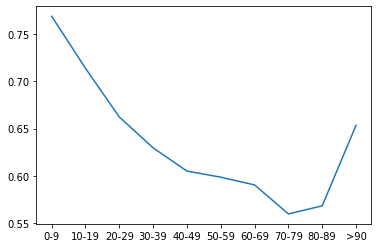

In [7]:
#plt.plot(age,sint_perc)
plt.plot(age,asint_perc)
plt.show()

In [12]:
final_df = pd.DataFrame({'age':age, 'asint_perc':asint_perc})
final_df

,age,asint_perc
0,0-9,0.768637
1,10-19,0.713713
2,20-29,0.662289
3,30-39,0.629699
4,40-49,0.605206
5,50-59,0.598790
6,60-69,0.590612
7,70-79,0.559993
8,80-89,0.568496
9,>90,0.653500


In [30]:
Y_asint_perc = sum(asint_perc[0:5])/len(asint_perc[0:5])
O_asint_perc = sum(asint_perc[5:10])/len(asint_perc[5:10])

[0.768637   0.713713   0.66228937 0.62969917 0.60520596]
[0.59879    0.59061176 0.5599927  0.56849581 0.65350022]


In [31]:
print(Y_asint_perc)
print(O_asint_perc)

0.675908899933204
0.5942780967734732
